# 2D Embedding manifold plot using Isomap

*18/2/2022*

This notebook demonstrates how to visualise the embedding space by extracting an
embedding manifold using the [Isomap](https://scikit-learn.org/stable/modules/manifold.html#isomap)
and rendering the triplets where the anchor-neighbor distant is the smallest (assuming that
these tile-pairs are ones where the model was able to work out at they contained similar structure,
i.e. a similar kind of cloud organisation across the whole tile).

In [1]:
from convml_tt.interpretation.plots import isomap2d
from convml_tt.data.examples import (
    fetch_example_dataset,
    ExampleData,
    load_pretrained_model,
    PretrainedModel,
)
from convml_tt.utils import get_embeddings
from convml_tt.data.dataset import ImageTripletDataset, TileType
from convml_tt.data.transforms import get_transforms

from pathlib import Path
import xarray as xr

In [2]:
data_path = fetch_example_dataset(dataset=ExampleData.SMALL100)
data_path

Using downloaded and verified file: data/Nx256_s200000.0_N0study_N100train.tgz
Extracting data/Nx256_s200000.0_N0study_N100train.tgz to data/


PosixPath('data/Nx256_s200000.0_N0study_N100train')

In [3]:
model = load_pretrained_model(pretrained_model=PretrainedModel.FIXED_NORM_STAGE2)

Using downloaded and verified file: data/fixednorm-stage-2.tgz
Extracting data/fixednorm-stage-2.tgz to data/
Weights loaded from `data/fixednorm-stage-2.torch.pkl`


In [14]:
dataset = ImageTripletDataset(
    data_dir=data_path,
    transform=get_transforms(step="predict", normalize_for_arch=model.base_arch),
    stage="train"
)

In [5]:
da_embs = get_embeddings(
    tile_dataset=dataset,
    model=model,
    prediction_batch_size=4,
)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

In [6]:
da_embs

<xarray.DataArray (tile_type: 3, tile_id: 200, emb_dim: 100)>
array([[[-0.00757501, -0.01696268, -0.01385025, ...,  0.02547195,
          0.00615112, -0.03173373],
        [ 0.01064737, -0.02861819, -0.01345679, ..., -0.00289472,
         -0.02501092,  0.00285346],
        [ 0.00033958,  0.00634395,  0.00487834, ...,  0.01352236,
          0.01292637, -0.00501185],
        ...,
        [ 0.04068266, -0.03238918,  0.00262566, ..., -0.04996339,
         -0.00596942,  0.00798504],
        [ 0.00934408, -0.02546416, -0.00965276, ...,  0.02269493,
         -0.01839625, -0.04094101],
        [ 0.00071   , -0.01026817, -0.0092726 , ...,  0.02814305,
          0.02130057, -0.02782532]],

       [[ 0.01461935, -0.01754585, -0.00229676, ...,  0.02643233,
         -0.00629828, -0.02914955],
        [-0.02315834, -0.02550713, -0.0162851 , ...,  0.01226674,
         -0.01349645, -0.01922691],
        [ 0.04589903, -0.02464513,  0.0005012 , ...,  0.04435179,
          0.01163204, -0.0157497 ],
...
        [ 0.00778784, -0.00923367,  0.00994966, ..., -0.02006568,
          0.0590248 ,  0.03217411],
        [-0.00025182, -0.014722  , -0.004937  , ...,  0.00662067,
         -0.00078977, -0.02745288],
        [-0.01625068, -0.00867358, -0.00915131, ...,  0.02441768,
          0.02096479, -0.02598257]],

       [[-0.02674857, -0.02896157, -0.02127067, ...,  0.00357672,
         -0.01757107, -0.00226591],
        [-0.01392307, -0.01890512, -0.0093431 , ...,  0.01597558,
         -0.0065069 , -0.03762203],
        [-0.01843063,  0.04168611,  0.01182051, ..., -0.01594795,
         -0.03482775,  0.01814057],
        ...,
        [-0.01561115, -0.00160929, -0.00553617, ..., -0.00265536,
         -0.02043306,  0.02449801],
        [ 0.01518402, -0.02290057, -0.01122925, ...,  0.01902609,
         -0.02253932,  0.01023187],
        [ 0.08661368, -0.01550563, -0.00091275, ...,  0.00491276,
         -0.00298199,  0.0424091 ]]], dtype=float32)
Coordinates:
  * tile_id    (tile_id) int64 0 1 2 3 4 5 6 7 ... 193 194 195 196 197 198 199
  * tile_type  (tile_type) <U8 'anchor' 'neighbor' 'distant'
Dimensions without coordinates: emb_dim
Attributes:
    tile_type:  ANCHOR
    stage:      train
    data_dir:   /home/leif/git-repos/convml_tt/example_notebooks/model_interp...

(<Figure size 1008x1008 with 1 Axes>,
 <AxesSubplot:xlabel='\nemb_isomap', ylabel='\nemb_isomap'>,
 Isomap())

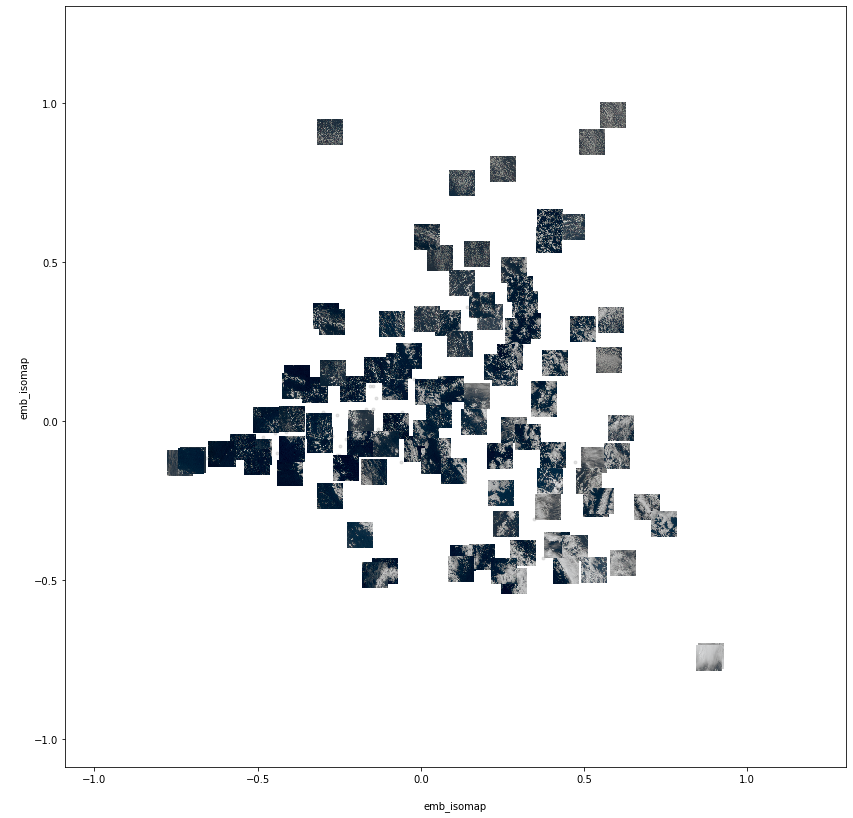

In [13]:
isomap2d.make_isomap_reference_plot(da_embs=da_embs, tile_size=0.1)